# Proyek Analisis Data: Bike Sharing Dataset
* Nama: Steven Manuel Angkasaputra
* Email: manuelsteven1811@gmail.com
* Id Dicoding: stevemanuel1

# Menentukan Pertanyaan Bisnis
* Bagaimana kondisi cuaca mempengaruhi jumlah permintaan sewa sepeda?
* Kapan waktu spesifik saat terjadi permintaan sepeda yang tinggi?

# Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style=None, palette=None)

# Data Wrangling

## Gathering Data

Data csv dibaca menggunakan library pandas

In [2]:
# bike sharing counts aggregated on hourly basis
df_hour = pd.read_csv('data/hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
# bike sharing counts aggregated on daily basis
df_day = pd.read_csv('data/day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Assessing Data

Pada tahapan ini, dataset diperiksa apakah terdapat missing value atau nilai yang hilang dan duplikasi pada data.

In [4]:
# hourly basis missing value
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# hourly basis duplicated value
df_hour.duplicated().sum()

0

In [6]:
# daily basis missing value
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# daily basis duplicated value
df_day.duplicated().sum()

0

Dapat dilihat bahwa tidak terdapat missing value maupun duplikasi pada data. <br>Selanjutnya data diperiksa persebaran nilainya menggunakan perintah .describe(), untuk melihat apakah terdapat outlier maupun nilai yang tidak masuk akal

In [8]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [9]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Tidak ditemukan nilai outlier ataupun nilai yang tidak masuk akal. Data bisa langsung digunakan untuk proses selanjutnya.

# Exploratory Data Analysis (EDA)

Untuk melihat apakah kondisi cuaca berkorelasi dengan jumlah sepeda yang disewa, dilakukan pemeriksaan korelasi antara jumlah tersewa dengan temperatur, kelembapan, dan kecepatan angin yaitu variabel numerik.

In [10]:
weather = df_day[['temp', 'hum', 'windspeed', 'cnt']].corr()
weather

,temp,hum,windspeed,cnt
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


Ditemukan bahwa temperatur memiliki nilai koefisien >0.6 mengartikan hubungan yang kuat dengan jumlah sepeda tersewa. Untuk memahami lebih lanjut hubungan tersebut, divisualisasikan menggunakan diagram scatter pada bagian berikutnya.
<br>Kolom situasi cuaca (variabel kategorik) dapat dilihat pengaruhnya dengan melakukan pivot kolom kondisi cuaca dengan total sepeda tersewa, seperti berikut.

In [11]:
df_hour.groupby(by='weathersit').agg({'cnt':'sum'})

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


Berikutnya untuk menjawab waktu spesifik yang memiliki permintaan sewa sepeda paling banyak, dilakukan groupby berdasarkan tahun dan bulan.

In [12]:
yr_mo = df_hour.groupby(by=['yr','mnth']).agg({'cnt':'sum'})
yr_mo

cnt
yr mnth        
0  1      38189
   2      48215
   3      64045
   4      94870
   5     135821
   6     143512
   7     141341
   8     136691
   9     127418
   10    123511
   11    102167
   12     87323
1  1      96744
   2     103137
   3     164875
   4     174224
   5     195865
   6     202830
   7     203607
   8     214503
   9     218573
   10    198841
   11    152664
   12    123713

Dilakukan groupby berdasarkan musim

In [13]:
season = df_day.groupby(by='season').agg({'cnt':'mean'})
season

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


Berikutnya diperiksa apakah hari berpengaruh terhadap permintaan sewa sepeda.

In [14]:
workingday = df_day.groupby(by='workingday').agg({'cnt':'mean'})
workingday

,cnt
workingday,
0,4330.168831
1,4584.820000


In [15]:
weekday = df_day.groupby(by='weekday').agg({'cnt':'sum'})
weekday

,cnt
weekday,
0,444027
1,455503
2,469109
3,473048
4,485395
5,487790
6,477807


Berikutnya diperiksa apakah hari libur nasional memiliki pengaruh terhadap permintaan sepeda. Digunakan metrik rata-rata karena jumlah hari libur nasional pasti lebih sedikit daripada hari biasa.

In [16]:
holiday = df_day.groupby(by='holiday').agg({'cnt':'mean'})
holiday

,cnt
holiday,
0,4527.104225
1,3735.000000


In [17]:
day = df_day.groupby(by=['holiday', 'workingday', 'weekday']).agg({'cnt':'mean', 'instant':'nunique'})
day

cnt  instant
holiday workingday weekday                      
0       0          0        4228.828571      105
                   6        4550.542857      105
        1          1        4398.866667       90
                   2        4544.621359      103
                   3        4520.825243      103
                   4        4720.343137      102
                   5        4718.588235      102
1       0          1        3973.666667       15
                   2        1013.000000        1
                   3        7403.000000        1
                   4        1960.000000        2
                   5        3247.000000        2

Pada bagian sebelumnya ditemukan bahwa permintaan akan sewa sepeda besar pada hari yang tidak libur nasional. Pada groupby diatas ditemukan suatu ledakan permintaan yang tidak biasa pada hari libur nasional yang tidak seperti hari libur nasional lainnya yang terletak pada hari rabu. Berikutnya akan diteliti ada apa pada hari tersebut.

In [18]:
df_day[df_day.weekday==3][df_day.workingday==0]

C:\Users\Steven\AppData\Local\Temp\ipykernel_28072\1418470540.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_day[df_day.weekday==3][df_day.workingday==0]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
550,551,2012-07-04,3,1,7,1,3,0,1,0.789167,0.732337,0.53875,0.13495,2562,4841,7403


# Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi jumlah permintaan sewa sepeda?

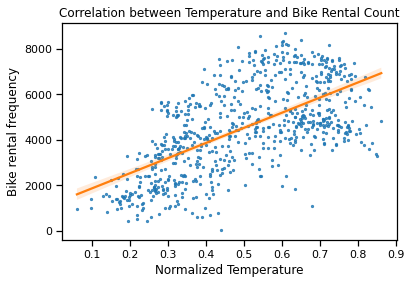

In [19]:
sns.regplot(x = df_day.temp, y = df_day.cnt, line_kws={"color": "tab:orange"}, scatter_kws={"s": 5})
plt.ylabel('Bike rental frequency')
plt.xlabel('Normalized Temperature')
plt.title('Correlation between Temperature and Bike Rental Count')
plt.show()

Pada saat temperatur tinggi terjadi kecenderungan permintaan sewa sepeda yang lebih tinggi.

## Pertanyaan 2: Kapan waktu spesifik saat terjadi permintaan sepeda yang tinggi?

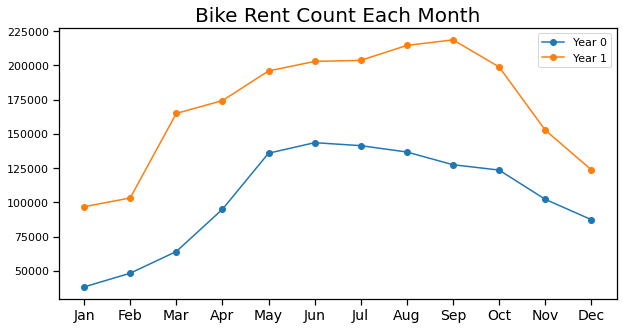

In [20]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(yr_mo.cnt.tolist()[:12], '-o', label='Year 0')
plt.plot(yr_mo.cnt.tolist()[12:], '-o', label='Year 1')
plt.title('Bike Rent Count Each Month', fontsize=20)
plt.xticks(range(len(month)), month, fontsize=14)
plt.legend()
plt.show()

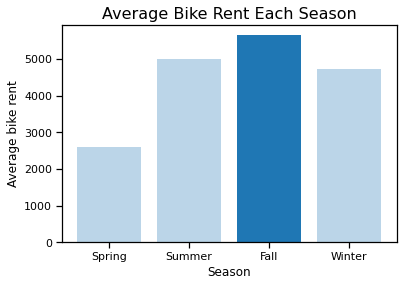

In [21]:
bars = plt.bar(['Spring', 'Summer', 'Fall', 'Winter'],season.cnt)
bars[0].set_alpha(0.3)
bars[1].set_alpha(0.3)
bars[3].set_alpha(0.3)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average bike rent', fontsize=12)
plt.title('Average Bike Rent Each Season', fontsize=16)
plt.show()

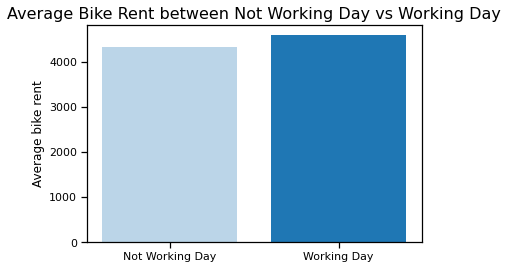

In [22]:
bars = plt.bar(['Not Working Day', 'Working Day'], workingday.cnt)
bars[0].set_alpha(0.3)
plt.ylabel('Average bike rent', fontsize=12)
plt.title('Average Bike Rent between Not Working Day vs Working Day', fontsize=16)
plt.show()

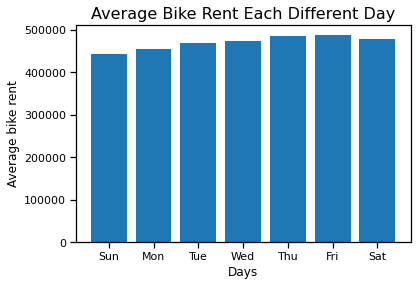

In [23]:
bars = plt.bar(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], weekday.cnt)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Average bike rent', fontsize=12)
plt.title('Average Bike Rent Each Different Day', fontsize=16)
plt.show()

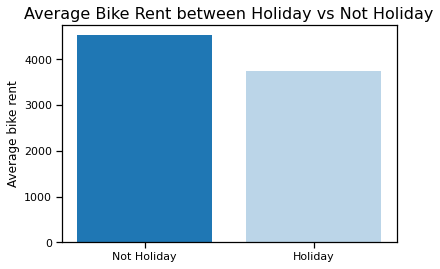

In [24]:
bars = plt.bar(['Not Holiday', 'Holiday'], holiday.cnt)
bars[1].set_alpha(0.3)
plt.ylabel('Average bike rent', fontsize=12)
plt.title('Average Bike Rent between Holiday vs Not Holiday', fontsize=16)
plt.show()

# Conclusion
* Terjadi kecenderungan permintaan sewa sepeda yang lebih tinggi pada saat temperatur yang lebih tinggi.
* Terjadi peningkatan permintaan sewa sepeda pada saat musim gugur yang terjadi pada bulan mei sampai september. Berikutnya permintaan sepeda tinggi pada saat hari kerja dan peningkatan permintaan yang terus meningkat dari hari senin sampai jumat, lalu menurun pada hari sabtu dan minggu. Pada hari libur nasional, terjadi penurunan permintaan sewa sepeda. Tetapi pada hari libur nasional 4 Juli 2012 yaitu hari kemerdekaan amerika serikat, terjadi permintaan sewa sepeda yang tinggi.